In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import sklearn
import scipy
import seaborn as sb
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
!pip3 install openpyxl

In [2]:
data=pd.read_csv("data\weather.csv")

In [3]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [5]:
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [6]:
import missingno as msno

<AxesSubplot:>

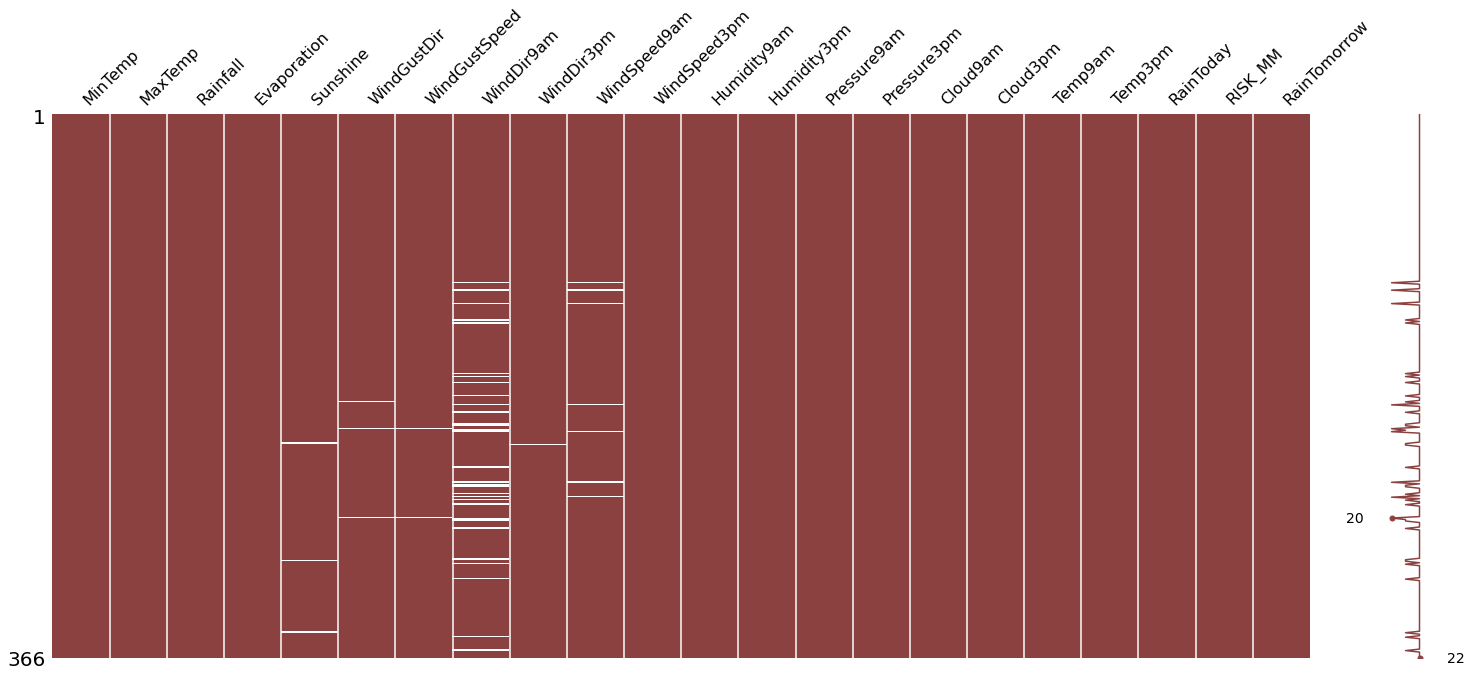

In [7]:
msno.matrix(data,color=(0.55,0.255,0.255),fontsize=16)

In [8]:
data_c=data[["RainToday","WindGustDir","WindDir9am","WindDir3pm"]]

In [9]:
data.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
data.drop(columns=["RainToday","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)

In [10]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [11]:
c_names=data_c.columns

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [14]:
data_c=imp_mode.fit_transform(data_c)

In [15]:
data_c=pd.DataFrame(data_c,columns=c_names)

In [16]:
data_c.tail()

,RainToday,WindGustDir,WindDir9am,WindDir3pm
361,No,NNW,SSE,NW
362,No,N,NNW,NNW
363,No,ESE,ENE,ENE
364,No,NW,SSW,WNW
365,No,NW,NW,WNW


In [17]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,Yes
1,14.0,26.9,3.6,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,Yes
2,13.7,23.4,3.6,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,Yes
3,13.3,15.5,39.8,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,Yes
4,7.6,16.1,2.8,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,No


In [18]:
data=pd.concat([data,data_c],axis=1)

In [19]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,8.0,24.3,0.0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,Yes,No,NW,SW,NW
1,14.0,26.9,3.6,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,Yes,Yes,ENE,E,W
2,13.7,23.4,3.6,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,Yes,Yes,NW,N,NNE
3,13.3,15.5,39.8,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,Yes,Yes,NW,WNW,W
4,7.6,16.1,2.8,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,No,Yes,SSE,SSE,ESE


In [20]:
corr=data.corr()

<AxesSubplot:>

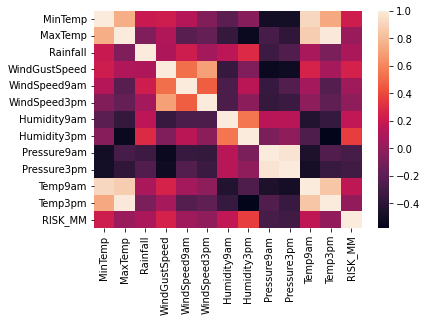

In [21]:
sb.heatmap(data=corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

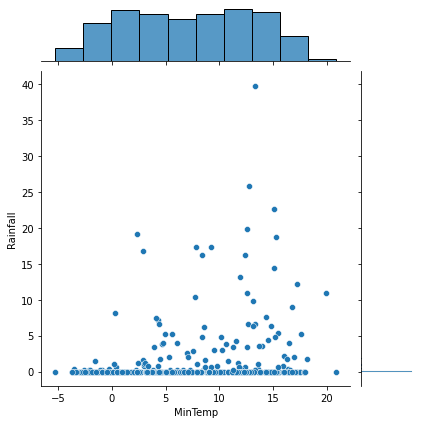

In [22]:
sb.jointplot(data["MinTemp"],data['Rainfall'])

<AxesSubplot:>

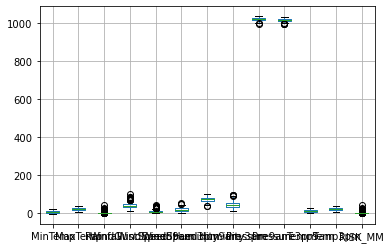

In [23]:
data.boxplot()

<AxesSubplot:xlabel='RainTomorrow', ylabel='Count'>

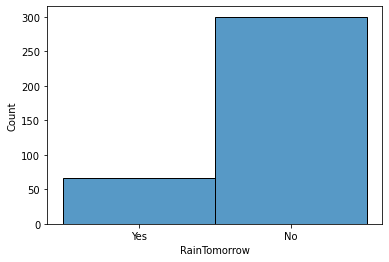

In [24]:
sb.histplot(data['RainTomorrow'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

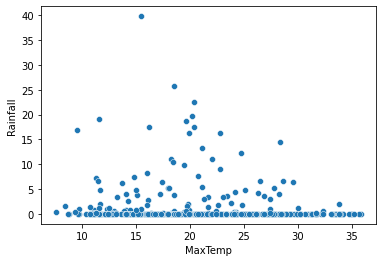

In [25]:
sb.scatterplot(data['MaxTemp'],data['Rainfall'])

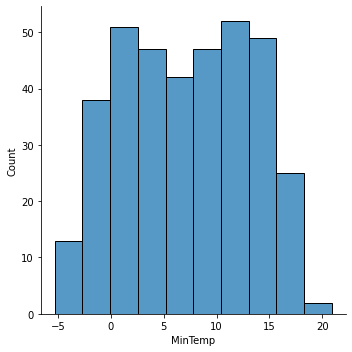

In [26]:
sb.displot(data['MinTemp'])

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
data = data[data['RainTomorrow'].notnull()]

In [29]:
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)

In [30]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

In [31]:
set(y)

{'No', 'Yes'}

In [33]:
names=x.columns

In [34]:
names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [35]:
sc=StandardScaler()

In [36]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [37]:
print(len(x),len(y))

366 366


In [38]:

LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])
x.head()

LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])
x.head()

LE = LabelEncoder()
x['WindDir9am'] = LE.fit_transform(x['WindDir9am'])
x.head()

LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,8.0,24.3,0.0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,0,7,12,7
1,14.0,26.9,3.6,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,1,1,0,13
2,13.7,23.4,3.6,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,1,7,3,5
3,13.3,15.5,39.8,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,1,7,14,13
4,7.6,16.1,2.8,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,1,10,10,2


In [39]:
LE = LabelEncoder()
y=pd.DataFrame(y)
y = LE.fit_transform(y)

In [40]:
print(len(x),len(y))

366 366


In [41]:
sc=StandardScaler()

In [42]:
x=sc.fit_transform(x)

In [43]:
x[:5]

array([[ 1.22047135e-01,  5.61221296e-01, -3.38485218e-01,
        -7.56614508e-01, -4.64338593e-01,  2.27663829e-01,
        -3.07606422e-01, -9.22225313e-01, -1.35035156e-03,
        -2.80219884e-01,  3.63059084e-01,  6.58867279e-01,
         5.14590764e-01, -4.69041576e-01,  1.57759793e-01,
         1.27317675e+00, -1.21658053e-01],
       [ 1.11912864e+00,  9.50363081e-01,  5.14590764e-01,
        -6.46354102e-02, -7.18644550e-01, -1.11515119e-01,
         6.07090535e-01, -5.06249740e-01, -1.09464408e+00,
        -1.30180025e+00,  9.14353031e-01,  9.75548781e-01,
         5.14590764e-01,  2.13200716e+00, -1.23917773e+00,
        -1.90578418e+00,  1.20092158e+00],
       [ 1.06927456e+00,  4.26518370e-01,  5.14590764e-01,
         3.47214664e+00, -4.64338593e-01, -1.35517126e+00,
         7.59540028e-01,  1.45477796e+00, -1.52896624e+00,
        -1.48754214e+00,  5.40895841e-01,  1.46144846e-01,
         9.09274370e+00,  2.13200716e+00,  1.57759793e-01,
        -1.11104395e+00, -5.6

In [44]:
x=pd.DataFrame(x,columns=names)

In [45]:
from sklearn import model_selection

In [46]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
RFC=RandomForestClassifier()

In [49]:
GBC=GradientBoostingClassifier()

In [50]:
np.any(np.isnan(x))

False

In [51]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [52]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
data.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RISK_MM          False
RainTomorrow     False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [54]:
x.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RISK_MM          False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [55]:
p1=RFC.predict(x_train)

In [56]:
p2=RFC.predict(x_test)

In [57]:
import sklearn.metrics as metrics

In [58]:
print(metrics.accuracy_score(y_train,p1))

1.0


In [59]:
print(metrics.accuracy_score(y_test,p2))

1.0


In [60]:
import pickle

In [61]:
pickle.dump(RFC,open('rainfall.pkl','wb'))
pickle.dump(LE,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('imputer.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))